<a href="https://colab.research.google.com/github/alirezash97/Time-frequency-analysis-course/blob/main/Denoising_assignment/Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
import numpy as np
import cv2

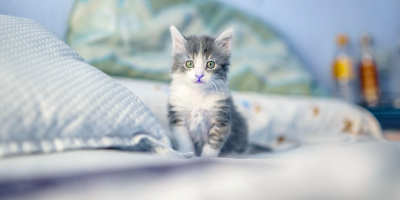

In [19]:
img = mpimg.imread('/content/cat.jpg')
img = cv2.resize(img, (400, 200), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

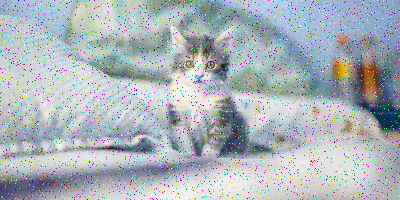

In [28]:
noisy_image = random_noise(img, mode='s&p',amount=0.05)
noise_img = np.array(255*noisy_image, dtype = 'uint8')
cv2_imshow(noise_img)

In [53]:
  def denoising(img, filter_shape=[3, 3], mode='average', threshold=100):
    
    
    numpy_image = np.array(img)
    if mode=='average':
      denoised_image = np.zeros((numpy_image.shape))
      for k in range(numpy_image.shape[2]):
        for j in range(numpy_image.shape[1]):
          for i in range(numpy_image.shape[0]):
            tmp = int(np.sum(numpy_image[ i:i+filter_shape[0], j:j+filter_shape[1], k]) / (filter_shape[0]*filter_shape[1]))
            denoised_image[i, j, k] = tmp
    elif mode=='hard':
      denoised_image = np.zeros((numpy_image.shape))
      for k in range(numpy_image.shape[2]):
        for j in range(numpy_image.shape[1]):
          for i in range(numpy_image.shape[0]):
            if numpy_image[i, j, k] > threshold:
              temp = numpy_image[i, j, k]
            else:
              temp = 0
            denoised_image[i, j, k] = temp
    elif mode=='soft':
      denoised_image = np.zeros((numpy_image.shape))
      for k in range(numpy_image.shape[2]):
        for j in range(numpy_image.shape[1]):
          for i in range(numpy_image.shape[0]):
            if numpy_image[i, j, k] > threshold:
              temp = np.sign(numpy_image[i, j, k])*abs(numpy_image[i, j, k] - threshold)
            else:
              temp = 0
            denoised_image[i, j, k] = temp
    
    return denoised_image


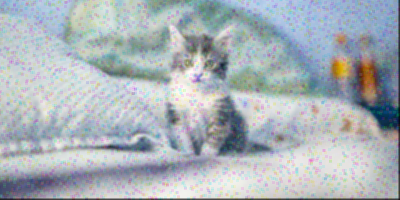

In [54]:
denoised_image = denoising(noise_img, [3, 3], 'average')
cv2_imshow(denoised_image)


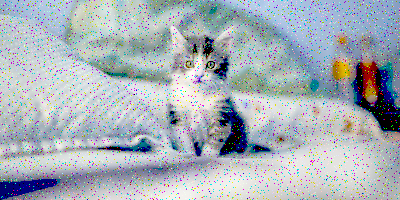

In [55]:
denoised_image = denoising(noise_img, mode='hard', threshold=100)
cv2_imshow(denoised_image)

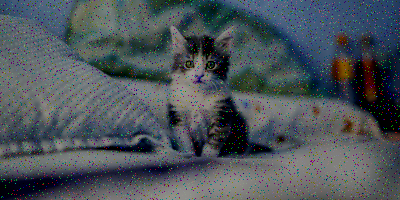

In [56]:
denoised_image = denoising(noise_img, mode='soft', threshold=100)
cv2_imshow(denoised_image)